In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

#Mohammad Saifullah

# POTENTIAL FUNCTIONS 

In [2]:
def ModifiedMorse(r):
    x = (r-re)/re
    return ( (De) * ( np.exp(-2*alpModifiedMorse*x ) - ( 2 * np.exp(-alpModifiedMorse*x)) ) + (l*(l + 1)*h**2) / (2*mu*r**2) )

def Morse(r): 
    x = r-re
    return (  (De) * (1 - np.exp(-alpMorse*x) )**2 + (l*(l + 1)*h**2) / (2*mu*r**2) - De )
  
def Pseudoharmonic(r):
    return (  (De * r**2)/(re**2) +  ( (De * re**2)/(r**2) ) - 2*De + (l*(l + 1)*h**2) / (2*mu*r**2) - De )    

def harmonic(r):
    return ( ( De/(r**2) ) * (r-re)**2 + + (l*(l + 1)*h**2) / (2*mu*r**2) - De )  

In [3]:
# Data Parameters for LiH molecule 

mu = 8.193936751e8
re = 1.5956
De = 2.515287
alpMorse = 1.7998368
alpModifiedMorse = 1.7998368
l = 0 
h = 1973

x_list0 = np.linspace(0.5,4,200)
x_list1 = np.linspace(0.8,3.5,200)
x_list2 = np.linspace(0.5 ,3.5,120)
x_list3 = np.linspace(0.8,4.5,200)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# PLOTTING POTENTIAL (U) VS R 

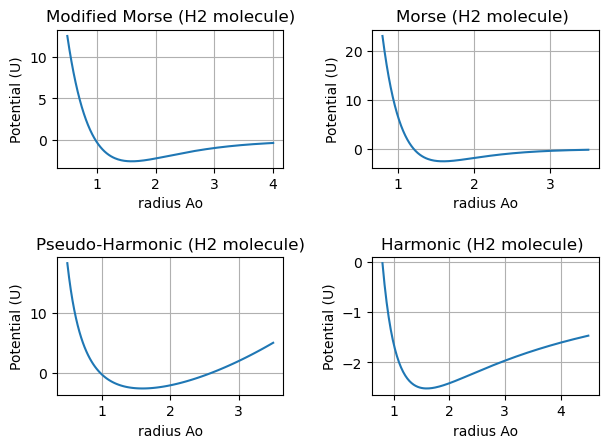

In [4]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x_list0,ModifiedMorse(x_list0))
plt.title("Modified Morse (H2 molecule)")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2,2,2)
plt.plot(x_list1,Morse(x_list1))
plt.title("Morse (H2 molecule) ")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x_list2,Pseudoharmonic(x_list2))
plt.title("Pseudo-Harmonic (H2 molecule)")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(x_list3,harmonic(x_list3))
plt.title("Harmonic (H2 molecule) ")
plt.xlabel('radius Ao')
plt.ylabel('Potential (U)')
plt.grid()

fig.tight_layout(pad=1.85)

plt.show()

# MAIN CODE OF SWE USING EULER'S RULE

In [5]:
# Main code to solve the SWE using Euler's rule 

def SWEode2(r,y,y1,V):
    return y*( E - V(r) ) * (-420.9867551) 

def SWEode1(npoints,h,r0,y0,y10,f,V):
    y = y0 
    y1 = y10 
    r = r0
    
    r_values = [r]
    y_values = [y]
    y1_values = [y1]
    
    for i in range(1,npoints + 1):
        r = r + h 
        y = y + y1 * h 
        y1 = y1 + f(r,y,y1,V) * h 
        r_values.append(r)
        y_values.append(y)
        y1_values.append(y10)
    return np.array([r_values,y_values,y1_values])

# 1. MORSE MODIFIED POTENTIAL 

## i. TESTING DATA 

In [6]:
# Testing data using Modified Morse Potential 

# n = 0 , l = 0 
E = -2.42886321
r0 = 0
y0 = 0 
y10 = 1e-34
h = 2.1/100
npoints = 100
l = 0 

num = SWEode1(npoints,h,r0,y0,y10,SWEode2,ModifiedMorse)

# n = 1 , l = 0 
E = -2.26054805
r0 = 0
y0 = 0 
y10 = 1e-33
h = 0.02
npoints = 105
l = 0 

num1 = SWEode1(npoints,h,r0,y0,y10,SWEode2,ModifiedMorse)

# n = 1 , l = 1 
E = -2.25875559
r0 = 0
y0 = 0 
y10 = 1e-33
h = 0.02
npoints = 105
l = 1 

num2 = SWEode1(npoints,h,r0,y0,y10,SWEode2,ModifiedMorse)


## ii. PLOTTING THE GRAPHS FOR :

### n = 0 , l = 0 
### n = 1 , l = 0 
### n = 1 , l = 1

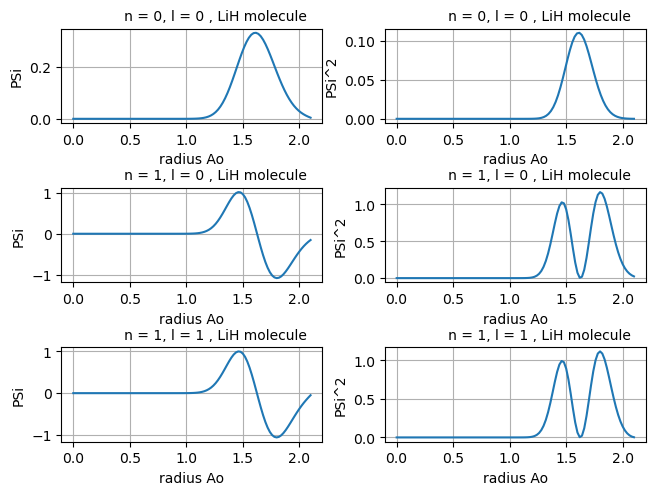

In [7]:
# Create subplots using Modified Morse Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , LiH molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()


## iii. Annotating the graph

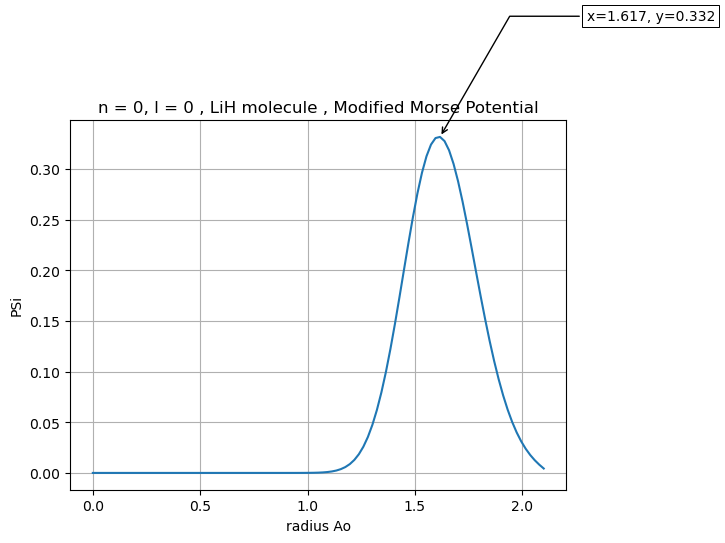

In [8]:
# Locating the data point for Maximum Psi value using Modified Morse Potential 

plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , LiH molecule , Modified Morse Potential')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()



# 2. MORSE POTENTIAL 

## i. TESTING DATA 

In [9]:
# Testing data using Morse Potential 

# n = 0 , l = 0 
E = -2.37569 
r0 = 0
y0 = 0 
y10 = 1e-68
h = 1.91/100
npoints = 100
l = 0 

num = SWEode1(npoints,h,r0,y0,y10,SWEode2,Morse)

# n = 1 , l = 0 
E = -2.1054805
r0 = 0
y0 = 0 
y10 = 1e-66
h = 0.02
npoints = 100
l = 0 

num1 = SWEode1(npoints,h,r0,y0,y10,SWEode2,Morse)

# n = 1 , l = 1 
E = -2.091875559
r0 = 0
y0 = 0 
y10 = 1e-66
h = 0.02
npoints = 100
l = 1 

num2 = SWEode1(npoints,h,r0,y0,y10,SWEode2,Morse)


## ii. PLOTTING THE GRAPHS FOR :

### n = 0 , l = 0 
### n = 1 , l = 0 
### n = 1 , l = 1

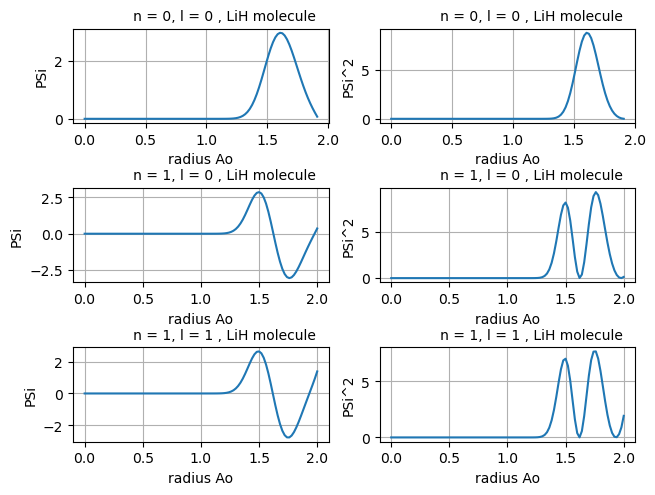

In [10]:
# Create subplots using Morse Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , LiH molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()


## iii. Annotating the graph

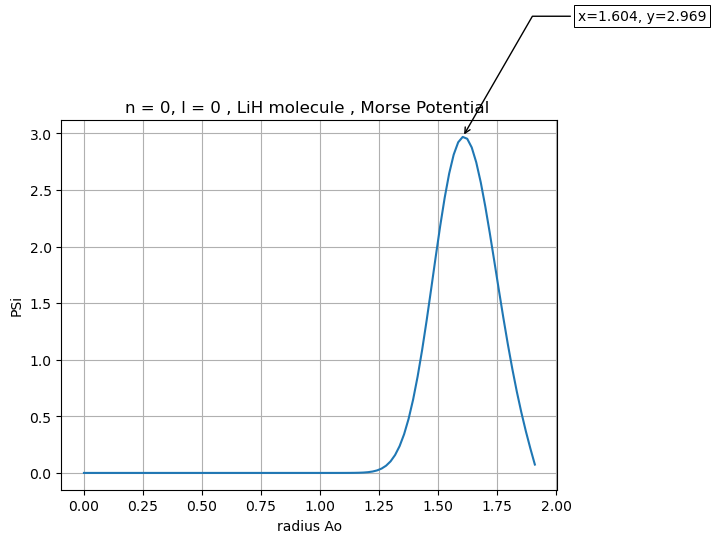

In [11]:
# Locating the data point for Maximum Psi value using Morse Potential 

plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , LiH molecule , Morse Potential ')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()


# 3. PSEUDO HARMONIC POTENTIAL 

## i. TESTING DATA 

In [12]:
# Testing data using Pseudo Harmonic Potential 
# n = 1 , l = 0 
E = -2.42886321
r0 = 0
y0 = 0  
y10 = 1e-47
h = 0.01
npoints =  200
l = 0 

num1 = SWEode1(npoints,h,r0,y0,y10,SWEode2,Pseudoharmonic)

# n = 1 , l = 0 
E = -2.21054805
r0 = 0
y0 = 0
y10 = 1e-63
h = 0.01
npoints = 200
l = 0 

num1 = SWEode1(npoints,h,r0,y0,y10,SWEode2,Pseudoharmonic)

# n = 1 , l = 1 
E = -2.20875559
r0 = 0
y0 = 0
y10 = 1e-63
h = 0.01
npoints = 200
l = 1 

num2 = SWEode1(npoints,h,r0,y0,y10,SWEode2,Pseudoharmonic)

## ii. PLOTTING THE GRAPHS FOR :

### n = 0 , l = 0 
### n = 1 , l = 0 
### n = 1 , l = 1 

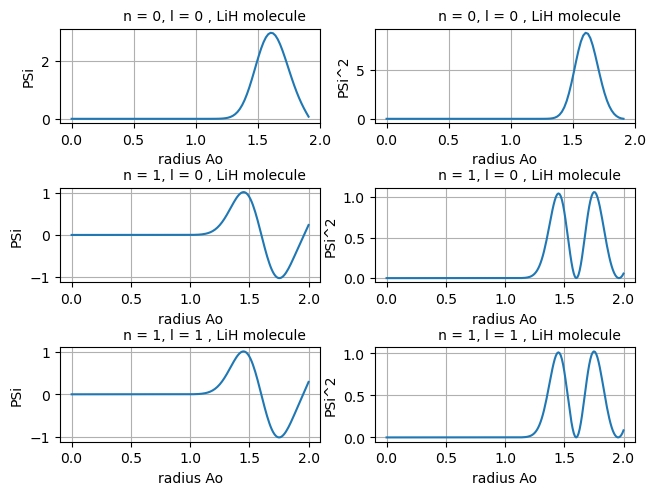

In [13]:
# Create subplots using Pseudo Harmonic Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , LiH molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()


## iii. Annotating the graph

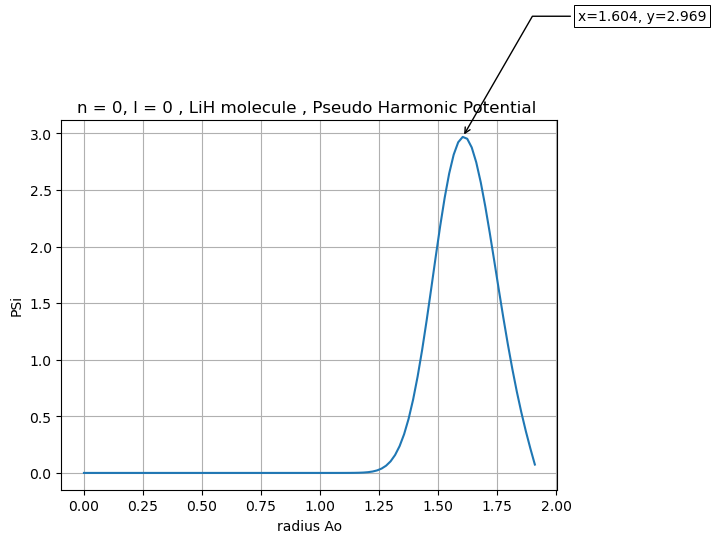

In [14]:
# Locating the data point for Maximum Psi value using Pseudo Harmonic Potential 

plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , LiH molecule , Pseudo Harmonic Potential ')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()


# 4. HARMONIC POTENTIAL 

 ## i. TESTING DATA 

In [15]:
# Testing data using Harmonic Potential 
# n = 1 , l = 0 
E = -2.42886321
r0 = 0
y0 = 0  
y10 = 1e-48
h = 0.01
npoints =  200
l = 0 

num1 = SWEode1(npoints,h,r0,y0,y10,SWEode2,harmonic)

# n = 1 , l = 0 
E = -2.21054805
r0 = 0
y0 = 0
y10 = 1e-54
h = 0.01
npoints = 175
l = 0 

num1 = SWEode1(npoints,h,r0,y0,y10,SWEode2,harmonic)

# n = 1 , l = 1 
E = -2.20875559
r0 = 0
y0 = 0
y10 = 1e-54
h = 0.01
npoints = 175
l = 1 

num2 = SWEode1(npoints,h,r0,y0,y10,SWEode2,harmonic)

## ii. PLOTTING THE GRAPHS FOR :

### n = 0 , l = 0 
### n = 1 , l = 0 
### n = 1 , l = 1 

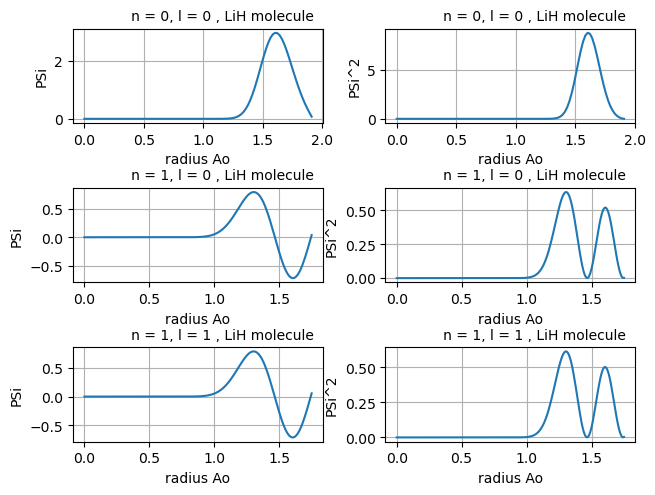

In [16]:
# Create subplots using Harmonic Potential on Testing Data 

# Psi (Probability Density) vs r
# Psi(Probability Density)**2 vs r


fig = plt.figure()

plt.subplot(3, 2, 1)
plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(num[0],num[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 0, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,3)
plt.plot(num1[0],num1[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 0 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,4)
plt.plot(num1[0],num1[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 0 , LiH molecule', fontsize = 10 )
plt.grid()


plt.subplot(3,2,5)
plt.plot(num2[0],num2[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()

plt.subplot(3,2,6)
plt.plot(num2[0],num2[1]**2)
plt.xlabel('radius Ao')
plt.ylabel('PSi^2')
plt.title('           n = 1, l = 1 , LiH molecule' , fontsize = 10 )
plt.grid()


fig.tight_layout(pad = 0.15)


plt.show()


## iii. Annotating the graph

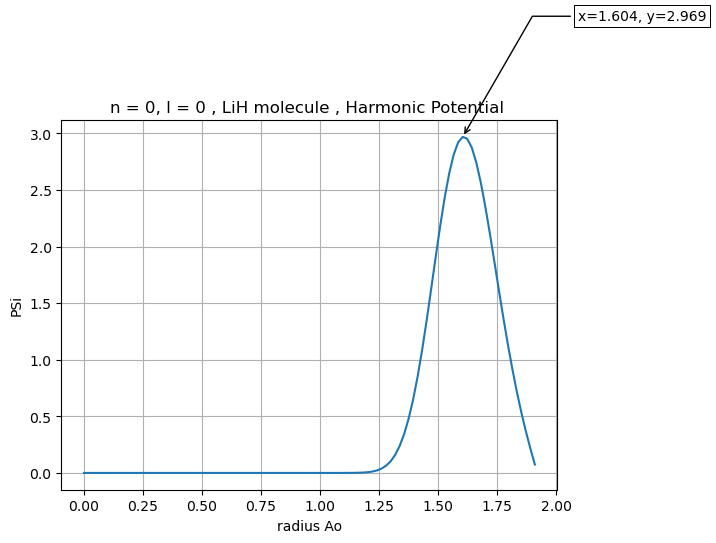

In [17]:
# Locating the data point for Maximum Psi value using Harmonic Potential 

plt.plot(num[0],num[1])
plt.xlabel('radius Ao')
plt.ylabel('PSi')
plt.title('n = 0, l = 0 , LiH molecule , Harmonic Potential ')

xmax = num[0][np.argmax(num[1])]
ymax = num[1].max()
text = "x={:.3f}, y={:.3f}".format(xmax, ymax)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.annotate(text, xy=(xmax, ymax), xytext=(1.3,1.3), **kw)

plt.grid()
fig.tight_layout()
